In [1]:
import pandas as pd

import os
import numpy as np

# 이동평균선을 활용한 상권 유형 구분하기

In [2]:
df =pd.read_csv('상권_요인분석/sum_fa_list.csv',encoding='euc-kr')
df_base = df.iloc[:,:7]
df=df.iloc[:,7:]

In [3]:
df_moving_avr = df.rolling(window=5,axis=1).mean()
df_moving_avr.dropna(axis=1,inplace=True)

In [4]:
df_moving_avr

,1912_score,2006_score,2012_score,2106_score,2112_score,2206_score
0,0.249987,0.252436,0.255929,0.258918,0.260281,0.269233
1,0.223821,0.227311,0.231944,0.235331,0.238745,0.245426
2,0.200420,0.203497,0.208478,0.214111,0.219107,0.226584
3,0.159948,0.164162,0.168765,0.171236,0.173168,0.177889
4,0.198776,0.202411,0.206737,0.209619,0.213246,0.220458
...,...,...,...,...,...,...
1672,0.221880,0.225162,0.229866,0.234089,0.239126,0.249533
1673,0.167829,0.171186,0.173552,0.179469,0.183062,0.191191
1674,0.202095,0.201922,0.203393,0.208254,0.213949,0.223244
1675,0.198610,0.199573,0.201385,0.201694,0.203662,0.209610


In [5]:
df

,1712_score,1806_score,1812_score,1906_score,1912_score,2006_score,2012_score,2106_score,2112_score,2206_score
0,0.243848,0.242771,0.254245,0.265012,0.244058,0.256095,0.260234,0.269191,0.271826,0.288821
1,0.214496,0.216720,0.231860,0.234165,0.221865,0.231946,0.239883,0.248796,0.251235,0.255270
2,0.192703,0.195946,0.204187,0.211984,0.197279,0.208090,0.220851,0.232353,0.236964,0.234662
3,0.147467,0.152618,0.167530,0.172246,0.159879,0.168534,0.175636,0.179885,0.181904,0.183485
4,0.187966,0.194078,0.206519,0.209689,0.195629,0.206141,0.215707,0.220926,0.227828,0.231687
...,...,...,...,...,...,...,...,...,...,...
1672,0.209659,0.212587,0.234716,0.234918,0.217520,0.226070,0.236107,0.255828,0.260104,0.269555
1673,0.162664,0.166679,0.167072,0.178840,0.163890,0.179451,0.178510,0.196655,0.196803,0.204535
1674,0.195839,0.208150,0.207686,0.212069,0.186731,0.194972,0.215508,0.231988,0.240545,0.233207
1675,0.194139,0.195478,0.209231,0.202248,0.191955,0.198951,0.204540,0.210777,0.212087,0.221695


In [6]:
df = df.iloc[:,4:]
df_active = df-df_moving_avr

array([[<AxesSubplot:title={'center':'1912_score'}>,
        <AxesSubplot:title={'center':'2006_score'}>],
       [<AxesSubplot:title={'center':'2012_score'}>,
        <AxesSubplot:title={'center':'2106_score'}>],
       [<AxesSubplot:title={'center':'2112_score'}>,
        <AxesSubplot:title={'center':'2206_score'}>]], dtype=object)

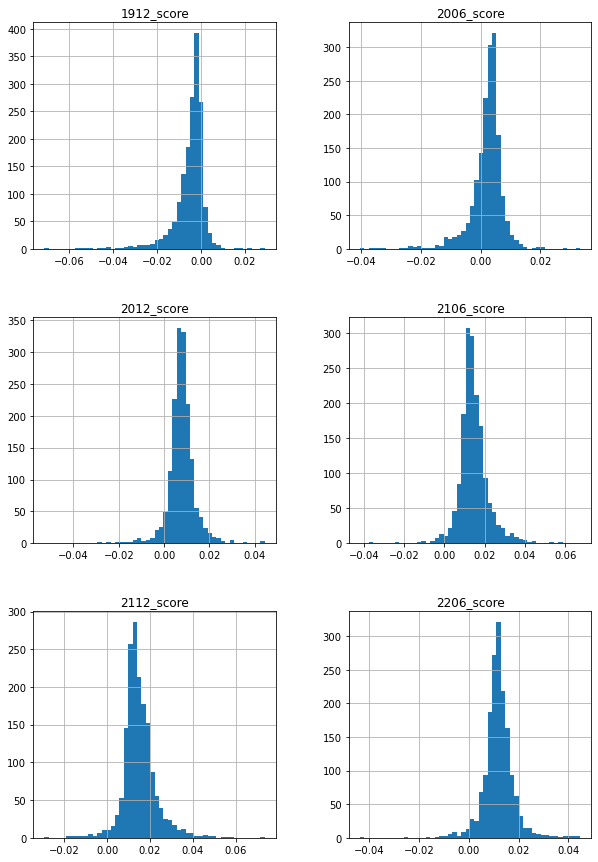

In [8]:
df_active.hist(figsize=(10,15),bins=50)

# 상권 유형 구분

In [10]:
#개별 시점에서 성장,쇠퇴,정체 구분
def type_func(x):
    if x >= 0.015:
        return '성장'
    elif x<= -0.005:
        return '쇠퇴'
    else: return '정체'

In [11]:
#전체 시점에서 다년간의 경향성을 구분
def type_func2(x):
    if (np.sum(x=='성장')>=3):
        return '성장'
    elif (np.sum(x=='쇠퇴')>=3):
        return '쇠퇴'
    else :
        return '정체'

In [12]:
for i in range(len(df_active.columns)):
    df_active[df_active.columns[i][:4]+'_유형'] = df_active.iloc[:,i].apply(lambda x : type_func(x))       

In [13]:
df_count = df_active.iloc[:,6:]
df_count['상권유형'] = df_count.apply(lambda x: type_func2(x),axis=1)

In [14]:
(np.sum(df_count=='쇠퇴',axis=1)>=4).sum()

35

In [15]:
df_count

,1912_유형,2006_유형,2012_유형,2106_유형,2112_유형,2206_유형,상권유형
0,쇠퇴,정체,정체,정체,정체,성장,정체
1,정체,정체,정체,정체,정체,정체,정체
2,정체,정체,정체,성장,성장,정체,정체
3,정체,정체,정체,정체,정체,정체,정체
4,정체,정체,정체,정체,정체,정체,정체
...,...,...,...,...,...,...,...
1672,정체,정체,정체,성장,성장,성장,성장
1673,정체,정체,정체,성장,정체,정체,정체
1674,쇠퇴,쇠퇴,정체,성장,성장,정체,정체
1675,쇠퇴,정체,정체,정체,정체,정체,정체


# 상권 활성화여부 도출

In [25]:
df2 = pd.read_csv('상권_요인분석/sum_fa_list.csv',encoding='euc-kr')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_standard = scaler.fit_transform(df2.iloc[:,7:])
score_set = pd.DataFrame(df_scaled_standard,columns=df2.iloc[:,7:].columns)

In [26]:
score_set

,1712_score,1806_score,1812_score,1906_score,1912_score,2006_score,2012_score,2106_score,2112_score,2206_score
0,0.902167,0.882807,0.846426,1.040538,0.993662,1.040902,0.888387,0.817953,0.764445,1.052432
1,0.319800,0.348966,0.381680,0.382066,0.486987,0.494969,0.444529,0.394257,0.350589,0.355099
2,-0.112600,-0.076753,-0.192850,-0.091412,-0.074346,-0.044339,0.029440,0.052641,0.063746,-0.073236
3,-1.010116,-0.964662,-0.953894,-0.939646,-0.928208,-0.938558,-0.956700,-1.037373,-1.042935,-1.136945
4,-0.206568,-0.115043,-0.144427,-0.140386,-0.111997,-0.088391,-0.082745,-0.184752,-0.119895,-0.135072
...,...,...,...,...,...,...,...,...,...,...
1672,0.223835,0.264269,0.440970,0.398151,0.387776,0.362131,0.362173,0.540349,0.528851,0.652006
1673,-0.708595,-0.676511,-0.963411,-0.798897,-0.836637,-0.691777,-0.894017,-0.688959,-0.743475,-0.699419
1674,-0.050377,0.173342,-0.120207,-0.089579,-0.315152,-0.340898,-0.087089,0.045064,0.135719,-0.103491
1675,-0.084110,-0.086354,-0.088125,-0.299220,-0.195888,-0.250933,-0.326306,-0.395580,-0.436266,-0.342756


In [27]:
bins=[]
for i in reversed(range(1,11)):
    bins.append(str(i)+'등급')

In [28]:
def split_type(x):
    answer = ''
    if x >= 0.5 : answer = '활성'
    elif x<=-0.5 : answer = '침체'
    else : answer = '일반'
    return answer

In [29]:
score_set['활성화여부'] = score_set['1712_score'].apply(lambda x : split_type(x))

In [30]:
score_set.head(2)

,1712_score,1806_score,1812_score,1906_score,1912_score,2006_score,2012_score,2106_score,2112_score,2206_score,활성화여부
0,0.902167,0.882807,0.846426,1.040538,0.993662,1.040902,0.888387,0.817953,0.764445,1.052432,활성
1,0.319800,0.348966,0.381680,0.382066,0.486987,0.494969,0.444529,0.394257,0.350589,0.355099,일반


# 데이터 결합

In [31]:
df_base = pd.concat([df_base,score_set.iloc[:,-1]],axis=1)
df_base = pd.concat([df_base,df_count.iloc[:,-1]],axis=1)

In [32]:
df_base['상권활성화유형']= df_base['활성화여부']+'-'+df_base['상권유형']

# 현재 상권활성도 등급 결합

In [33]:
FA_2206 = pd.read_csv('상권_요인분석/FA_market_202206_pre.csv',encoding='euc-kr')
FA_2206.iloc[:,-2:]

,2206_절대등급,2206_상대등급
0,8,2
1,9,3
2,9,4
3,10,10
4,9,5
...,...,...
1672,8,2
1673,10,8
1674,9,5
1675,9,6


In [34]:
df_base = pd.concat([df_base,FA_2206.iloc[:,-2:]],axis=1)

In [35]:
df_base

,상권명,다중지역정보,업종정보,위도,경도,wkt,상권코드,활성화여부,상권유형,상권활성화유형,2206_절대등급,2206_상대등급
0,성남은행초등학교,"{""type"":""Polygon"",""coordinates"":[[[127.1687262...",두발 미용업/일반 교과학원/치킨 전문점/한식 일반 음식점업/노래 연습장 운영업/기타...,37.460705,127.168758,"POLYGON ((127.1687262760 37.4620601200, 127.16...",골목_1,활성,정체,활성-정체,8,2
1,가림로201번안길,"{""type"":""Polygon"",""coordinates"":[[[126.8617425...",전자상거래 소매업/기타 음ㆍ식료품 위주 종합 소매업/자동차 세차업/두발 미용업,37.475776,126.861436,"POLYGON ((126.8617425380 37.4748298650, 126.86...",골목_2,일반,정체,일반-정체,9,3
2,내각1로73번안길,"{""type"":""Polygon"",""coordinates"":[[[127.1649527...",한식 일반 음식점업/두발 미용업/부동산 중개 및 대리업/한식 육류 요리 전문점/노래...,37.711797,127.161510,"POLYGON ((127.1649527610 37.7043120880, 127.16...",골목_3,일반,정체,일반-정체,9,4
3,양주산성로,"{""type"":""Polygon"",""coordinates"":[[[126.9873577...",두발 미용업/일반 교과학원/화초 및 식물 소매업/통신기기 소매업/한식 육류 요리 전...,37.788623,126.987220,"POLYGON ((126.9873577160 37.7908375740, 126.98...",골목_4,침체,정체,침체-정체,10,10
4,도일로135번길,"{""type"":""Polygon"",""coordinates"":[[[126.7835814...",두발 미용업/치킨 전문점/체인화 편의점/한식 일반 음식점업/기타 음ㆍ식료품 위주 종...,37.343110,126.783057,"POLYGON ((126.7835814060 37.3430218760, 126.78...",골목_5,일반,정체,일반-정체,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1672,광명사거리역_4번출구,"{""type"":""Polygon"",""coordinates"":[[[126.8536079...",기타 주점업/한식 일반 음식점업/한식 육류 요리 전문점/노래 연습장 운영업/커피 전...,37.479619,126.852135,"POLYGON ((126.8536079430 37.4782792810, 126.85...",발달_853,일반,성장,일반-성장,8,2
1673,성복2로,"{""type"":""Polygon"",""coordinates"":[[[127.0773354...",일반의원/두발 미용업/한식 일반 음식점업/의약품 및 의료용품 소매업/기타 주점업/셔...,37.313360,127.078773,"POLYGON ((127.0773354300 37.3137514240, 127.07...",발달_854,침체,정체,침체-정체,10,8
1674,광교중앙로,"{""type"":""Polygon"",""coordinates"":[[[127.0687753...",두발 미용업/일반 교과학원/피자 햄버거 샌드위치 및 유사 음식점업/한식 육류 요...,37.296904,127.068295,"POLYGON ((127.0687753130 37.2965215900, 127.06...",발달_855,일반,정체,일반-정체,9,5
1675,서수원버스터미널,"{""type"":""Polygon"",""coordinates"":[[[126.9719643...",기타 의복 소매업/화장품 비누 및 방향제 소매업/체인화 편의점/신발 소매업/속옷 ...,37.282524,126.970408,"POLYGON ((126.9719643130 37.2822193820, 126.97...",발달_856,일반,정체,일반-정체,9,6


# 경제회복도,업력

In [36]:
eco_recover=pd.read_csv('상권_컬럼/상권_경제회복도.csv',encoding='euc-kr')
boa = pd.read_csv('상권_컬럼/상권_업력.csv',encoding='euc-kr')

In [37]:
boa=boa[['상권코드','업력']]

In [38]:
df_base =pd.merge(left=df_base,right=eco_recover,how='inner',on='상권코드')
df_base =pd.merge(left=df_base,right=boa,how='inner',on='상권코드')


In [39]:
df_base.head(2)

,상권명,다중지역정보,업종정보,위도,경도,wkt,상권코드,활성화여부,상권유형,상권활성화유형,2206_절대등급,2206_상대등급,경제회복도,업력
0,성남은행초등학교,"{""type"":""Polygon"",""coordinates"":[[[127.1687262...",두발 미용업/일반 교과학원/치킨 전문점/한식 일반 음식점업/노래 연습장 운영업/기타...,37.460705,127.168758,"POLYGON ((127.1687262760 37.4620601200, 127.16...",골목_1,활성,정체,활성-정체,8,2,5,13.665761
1,가림로201번안길,"{""type"":""Polygon"",""coordinates"":[[[126.8617425...",전자상거래 소매업/기타 음ㆍ식료품 위주 종합 소매업/자동차 세차업/두발 미용업,37.475776,126.861436,"POLYGON ((126.8617425380 37.4748298650, 126.86...",골목_2,일반,정체,일반-정체,9,3,5,11.750000


In [40]:
#컬럼 정리를 하고 싶으면 추가로 여기서 df_base를 정제 하면됨


# 최종 저장

In [41]:
df_base.to_csv('상권_결과물/상권활성도_최종.csv',encoding='euc-kr',index=False)

In [42]:
df = pd.read_csv('상권_결과물/상권활성도_최종.csv',encoding='euc-kr')

In [43]:
df['상권활성화유형'].value_counts()

일반-정체    694
침체-정체    538
활성-정체    170
활성-성장    119
일반-성장     97
활성-쇠퇴     30
침체-성장     24
일반-쇠퇴      5
Name: 상권활성화유형, dtype: int64